<a href="https://colab.research.google.com/github/vishu0047/ANN_in_Keras/blob/master/Keract_activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from utils.DL_utils import train_CNN_keras,preprocess_image

In [0]:
train_directory = "../Data/101_ObjectCategories/"
target_size=(512,512)
batch_size=4
classes = ['crab','cup','brain','camera','chair']
num_classes = len(classes)
num_epochs=10

### Train the model

In [0]:
model = train_CNN_keras(train_directory=train_directory,
                  num_epochs=num_epochs,
                  target_size=target_size,
                  classes = classes, 
                  batch_size=batch_size,
                  num_classes=num_classes,verbose=1)

Using TensorFlow backend.


Found 340 images belonging to 5 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
85/85 [==============================] - 129s 2s/step - loss: 1.6276 - acc: 0.3206
Epoch 2/10
85/85 [==============================] - 131s 2s/step - loss: 1.4309 - acc: 0.3912
Epoch 3/10
85/85 [==============================] - 121s 1s/step - loss: 1.0299 - acc: 0.6147
Epoch 4/10
85/85 [==============================] - 126s 1s/step - loss: 0.6596 - acc: 0.7765
Epoch 5/10
85/85 [==============================] - 133s 2s/step - loss: 0.4168 - acc: 0.8765
Epoch 6/10
85/85 [==============================] - 132s 2s/step - loss: 0.3135 - acc: 0.9118
Epoch 7/10
85/85 [==============================] - 127s 1s/step - loss: 0.2333 - acc: 0.9412
Epoch 8/10
85/85 [==============================] - 115s 1s/step - loss: 0.1882 - acc: 0.9735
Epoch 9/10
85/85 [==============================] - 118s 1s/step - loss: 0.1468 - acc: 

### A random image of a human brain downloaded from the internet

In [0]:
img_path = '../images/cup-1.jpg'

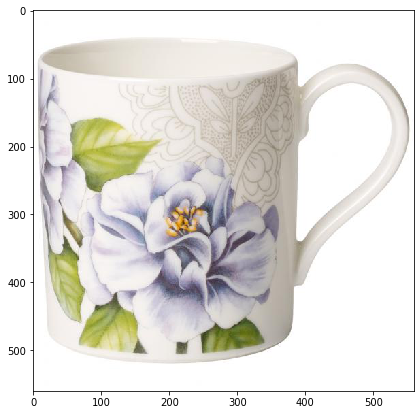

In [0]:
import matplotlib.pyplot as plt
import PIL
plt.figure(figsize=(8,7))
plt.imshow(PIL.Image.open(img_path))
plt.show()

### Just pass on the image path, model, and target size, to the `preprocess_image` function

In [0]:
x = preprocess_image(img_path=img_path,model=model,resize=target_size)

### We can check the model prediction (probabilities)

In [0]:
model.predict(x)

array([[7.6515257e-04, 8.4052128e-01, 4.3299285e-04, 5.4574362e-03,
        1.5282319e-01]], dtype=float32)

So, the 3rd class is being predicted by the trained model with close to 1 probability. That must be the brain class.

### Generate the activation maps

It is as easy as,
```
from keract import get_activations
activations = get_activations(model, x, layer_name)
```

- `model` is a keras.models.Model object.
- `x` is a numpy array to feed to the model as input. In the case of multi-input, x is of type List. We use the Keras convention (as used in predict, fit...).
- `layer_name` (optional) - the layer to get activations for if you only want the activations for one layer

In [0]:
from keract import get_activations
activations = get_activations(model, x)

### Display the activation maps
The code is,
```
from keract import display_activations
display_activations(activations, cmap="gray", save=False)
```
- `activations` a dictionary mapping layers to their activations (the output of get_activations)
- `cmap` (optional) a string of a valid matplotlib colourmap
- `save` (optional) a bool, if True the images of the activations are saved rather than being shown


conv2d_1/Relu:0 (1, 510, 510, 16) 


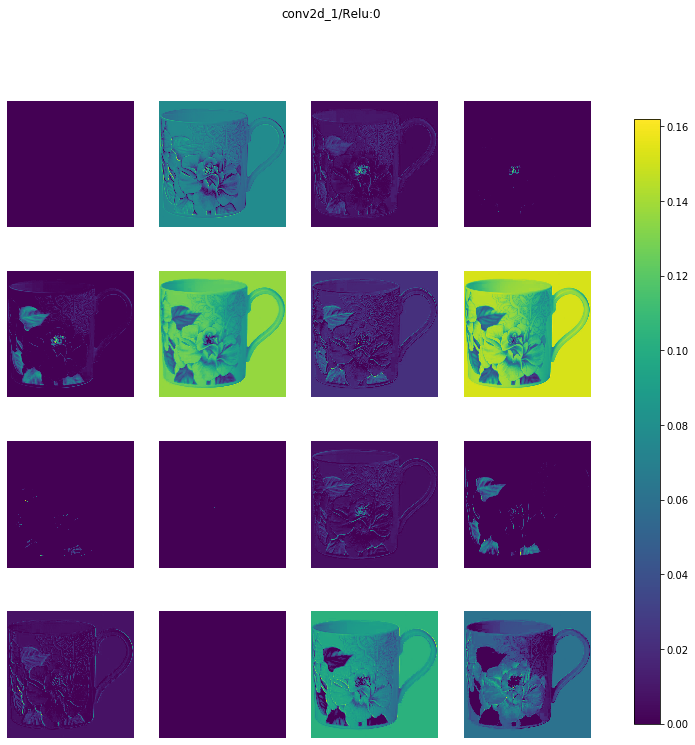

max_pooling2d_1/MaxPool:0 (1, 255, 255, 16) 


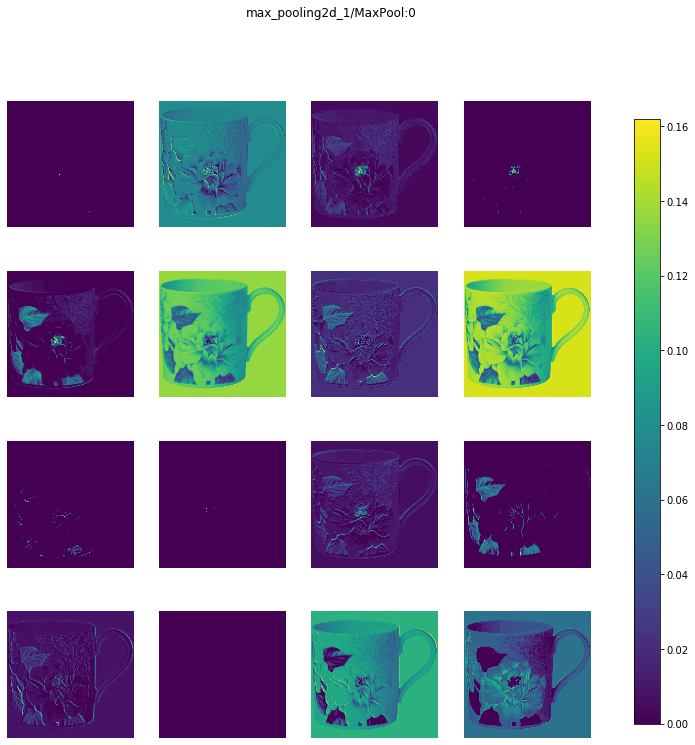

conv2d_2/Relu:0 (1, 253, 253, 32) 


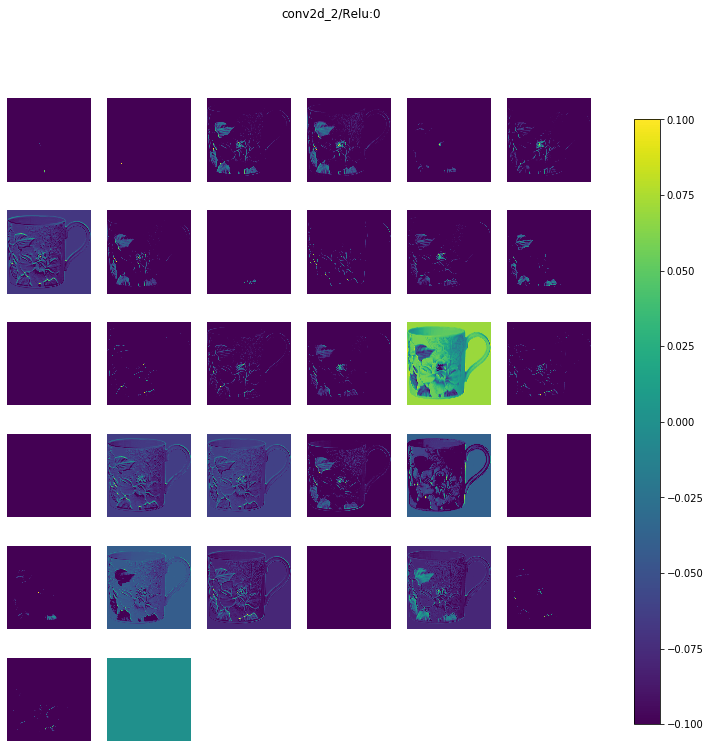

max_pooling2d_2/MaxPool:0 (1, 126, 126, 32) 


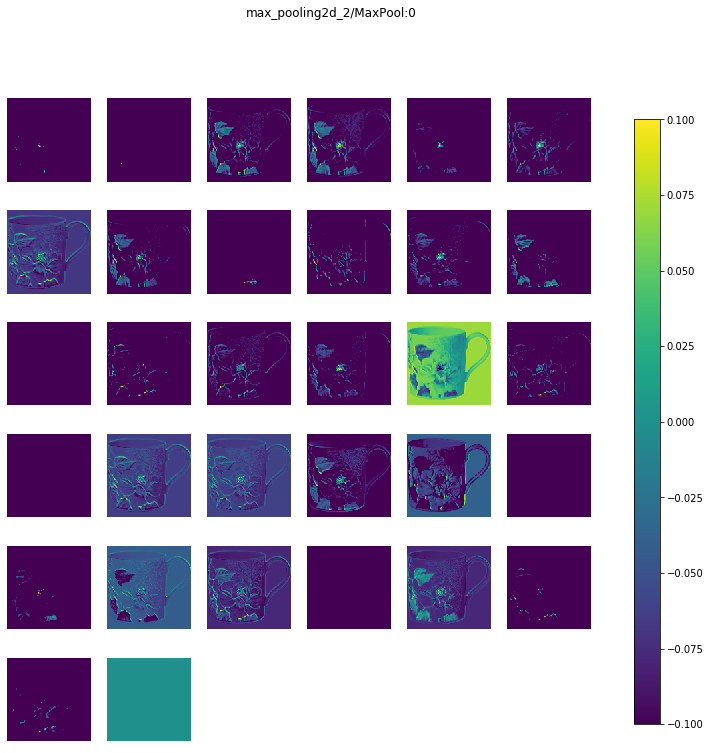

conv2d_3/Relu:0 (1, 124, 124, 64) 


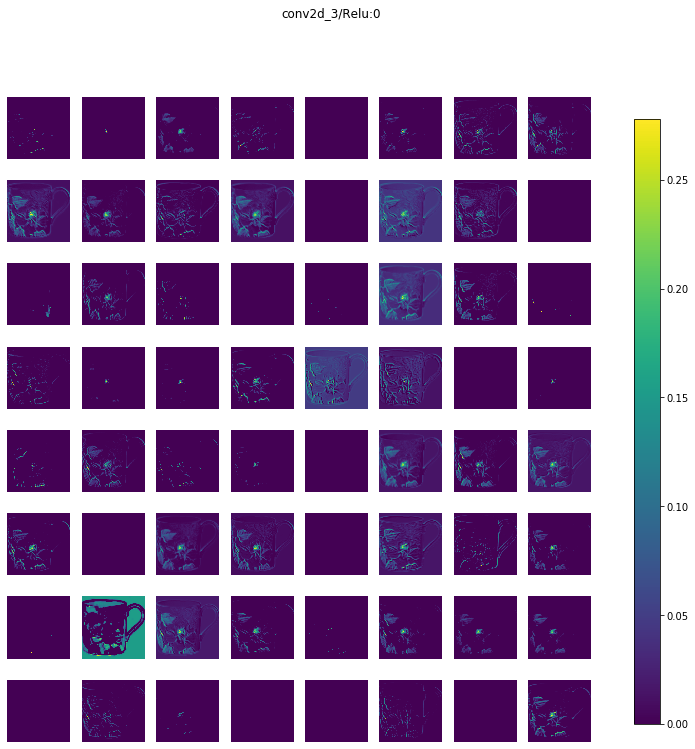

max_pooling2d_3/MaxPool:0 (1, 62, 62, 64) 


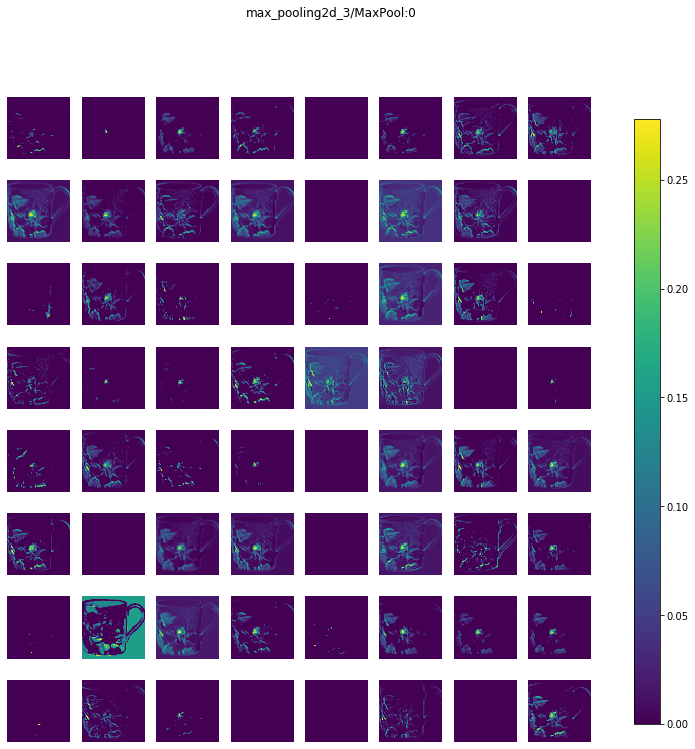

conv2d_4/Relu:0 (1, 60, 60, 64) 


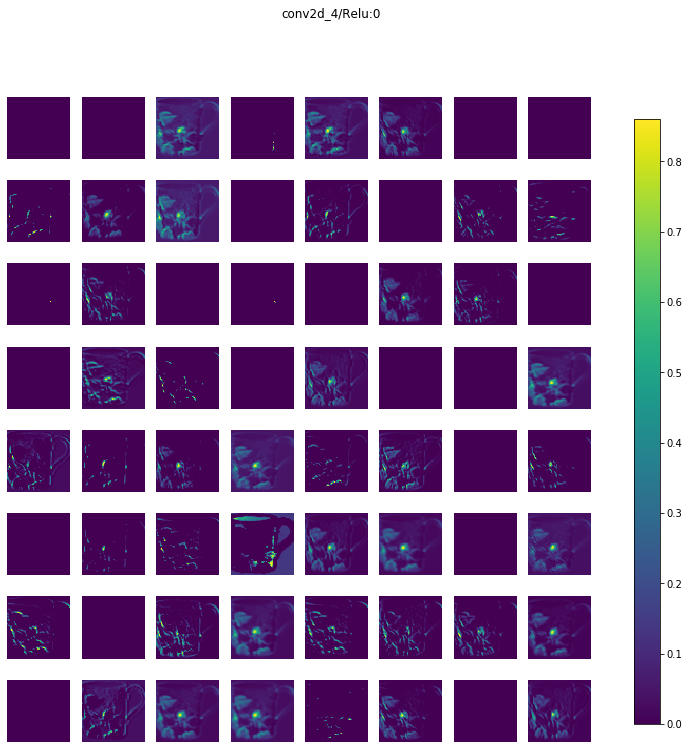

max_pooling2d_4/MaxPool:0 (1, 30, 30, 64) 


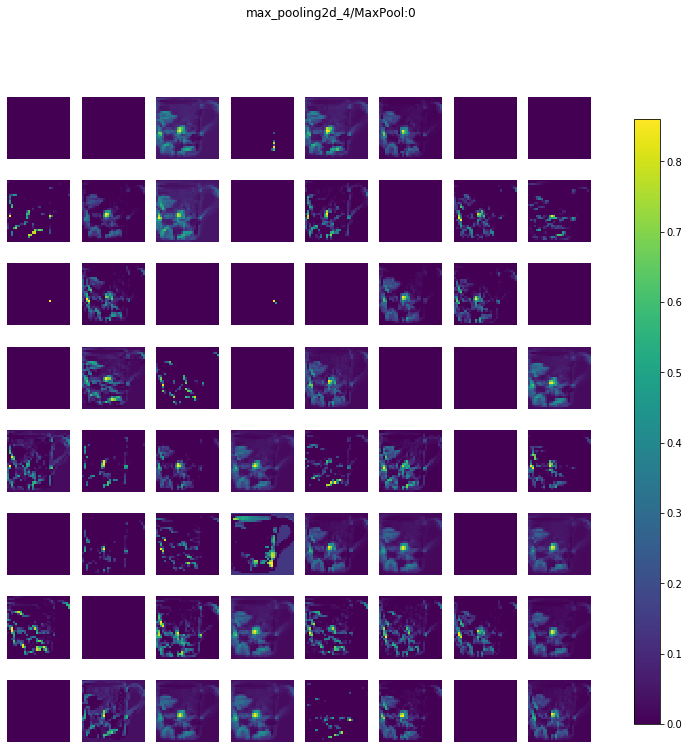

conv2d_5/Relu:0 (1, 28, 28, 64) 


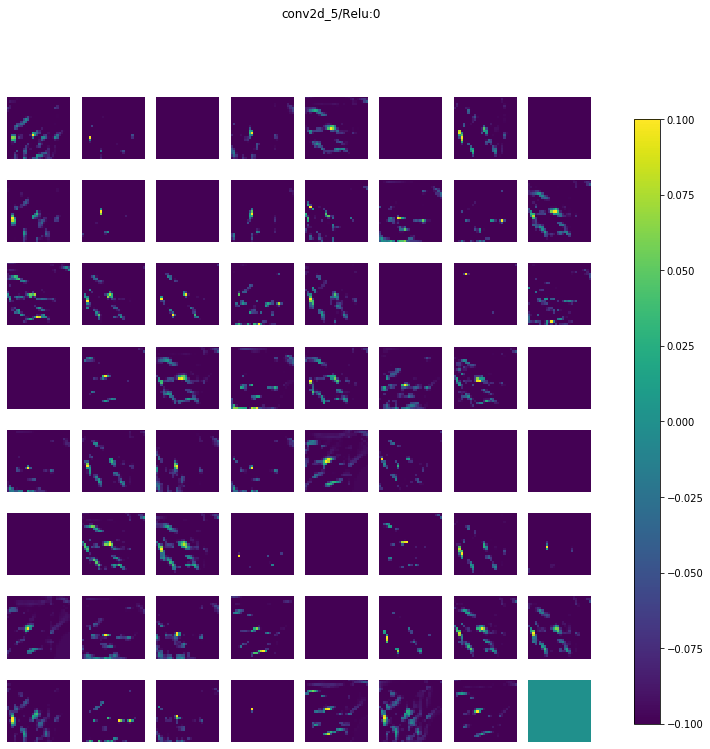

max_pooling2d_5/MaxPool:0 (1, 14, 14, 64) 


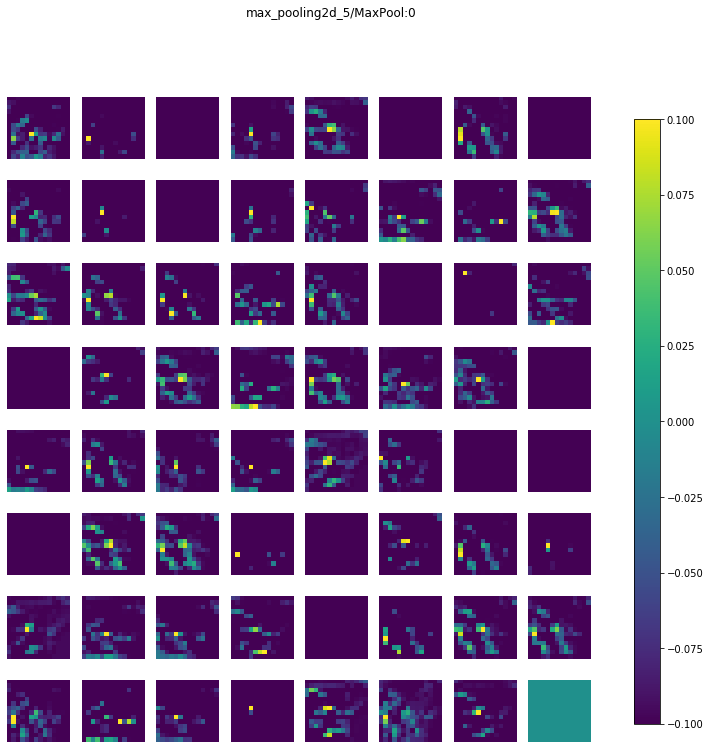

flatten_1/Reshape:0 (1, 12544) -> Skipped. 2D Activations.
dense_1/Relu:0 (1, 512) -> Skipped. 2D Activations.
dense_2/Softmax:0 (1, 5) -> Skipped. 2D Activations.


In [0]:
from keract import display_activations
display_activations(activations, save=False)

### Can also display heatmaps

conv2d_1/Relu:0 (1, 510, 510, 16) 


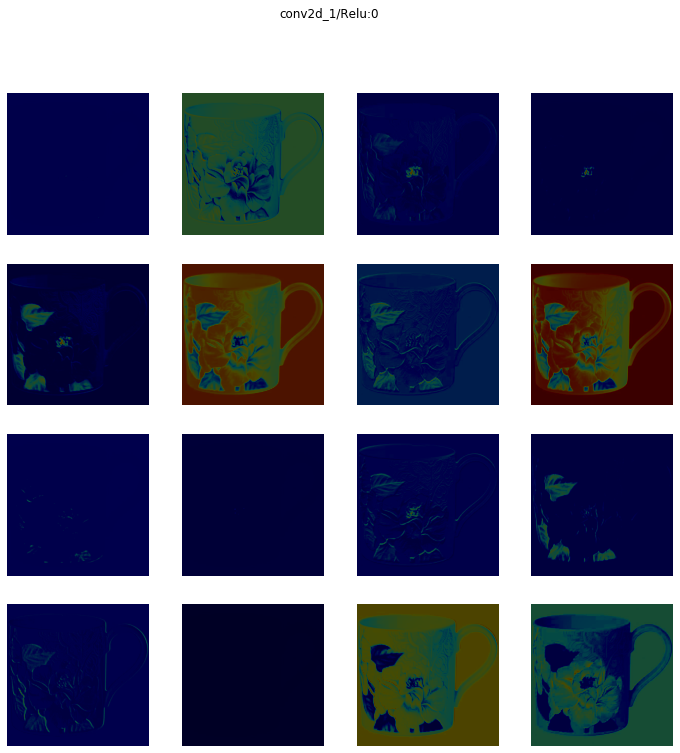

max_pooling2d_1/MaxPool:0 (1, 255, 255, 16) 


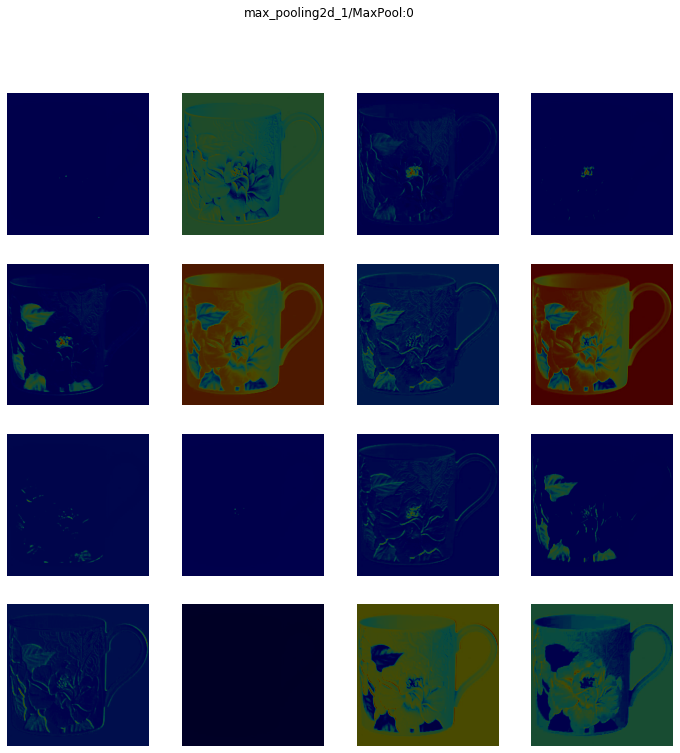

conv2d_2/Relu:0 (1, 253, 253, 32) 


max_pooling2d_2/MaxPool:0 (1, 126, 126, 32) 


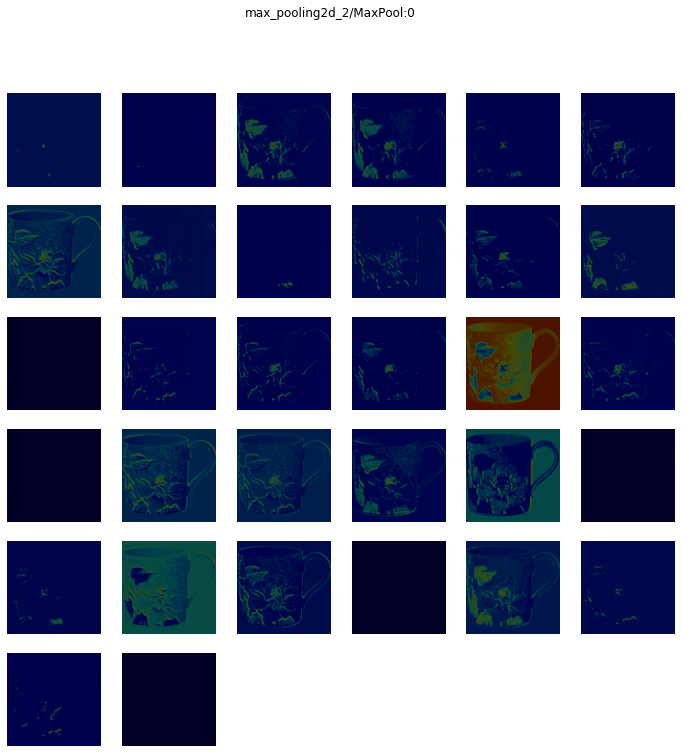

conv2d_3/Relu:0 (1, 124, 124, 64) 


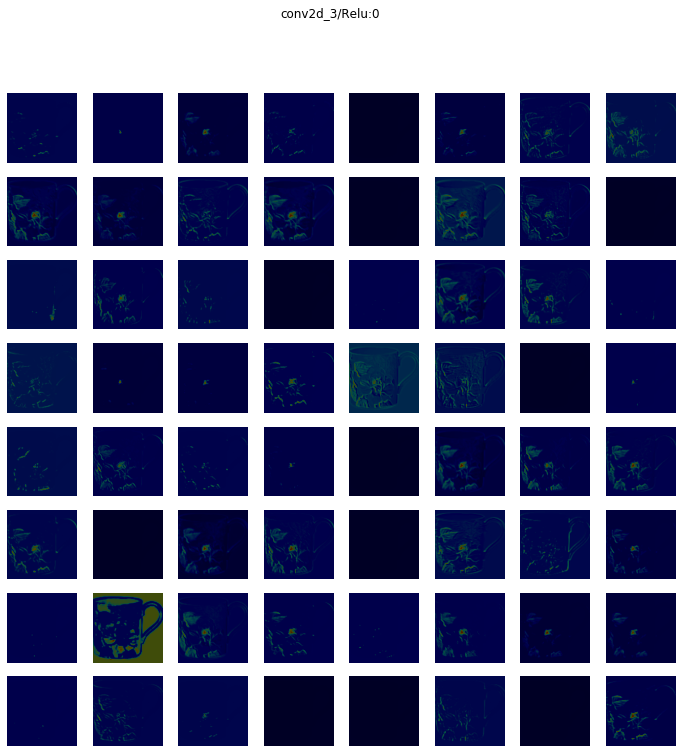

max_pooling2d_3/MaxPool:0 (1, 62, 62, 64) 


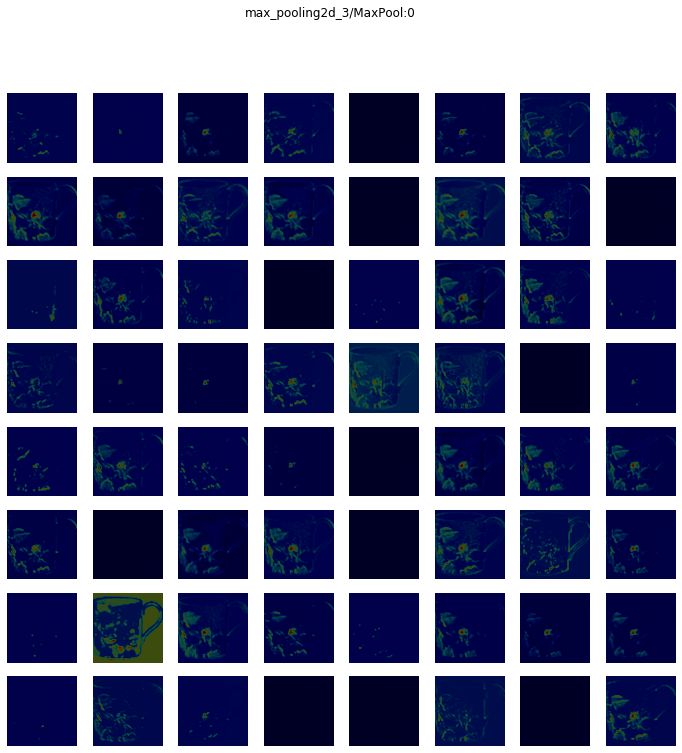

conv2d_4/Relu:0 (1, 60, 60, 64) 


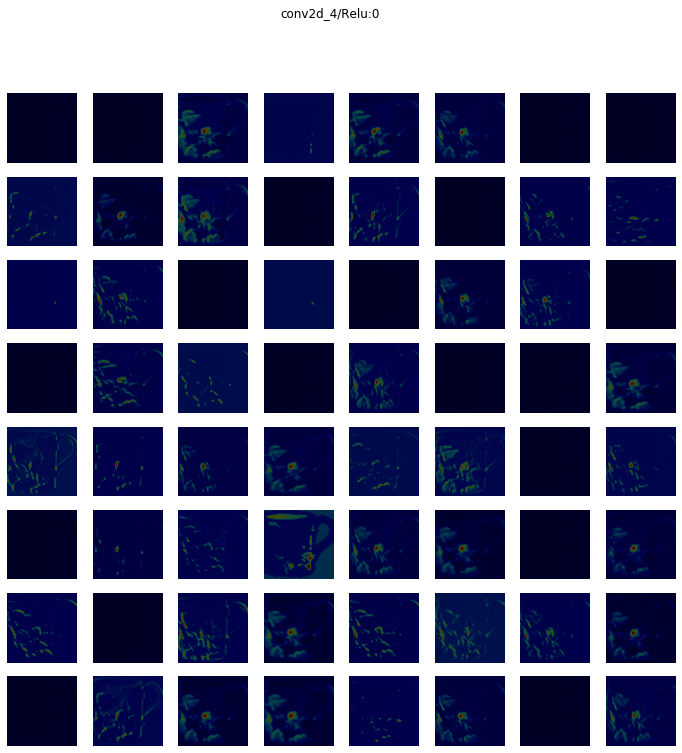

max_pooling2d_4/MaxPool:0 (1, 30, 30, 64) 


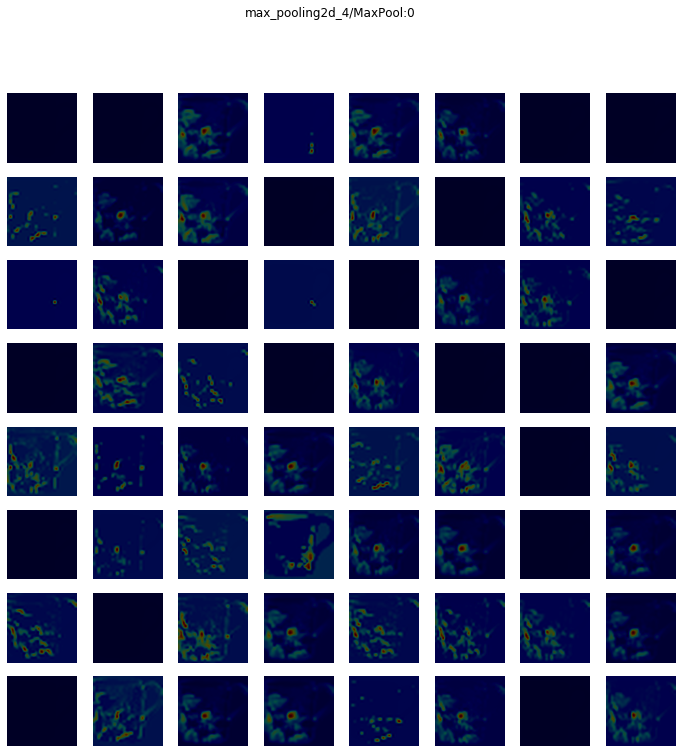

conv2d_5/Relu:0 (1, 28, 28, 64) 


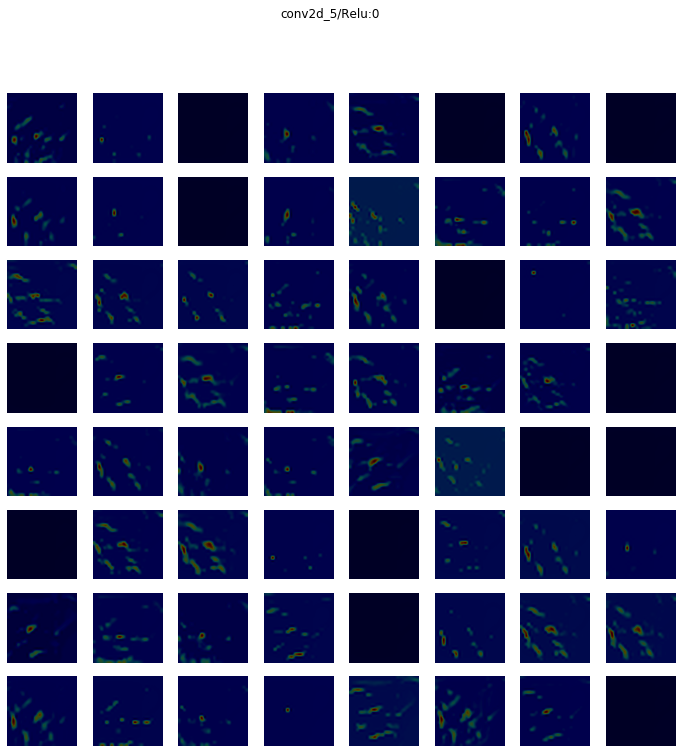

max_pooling2d_5/MaxPool:0 (1, 14, 14, 64) 


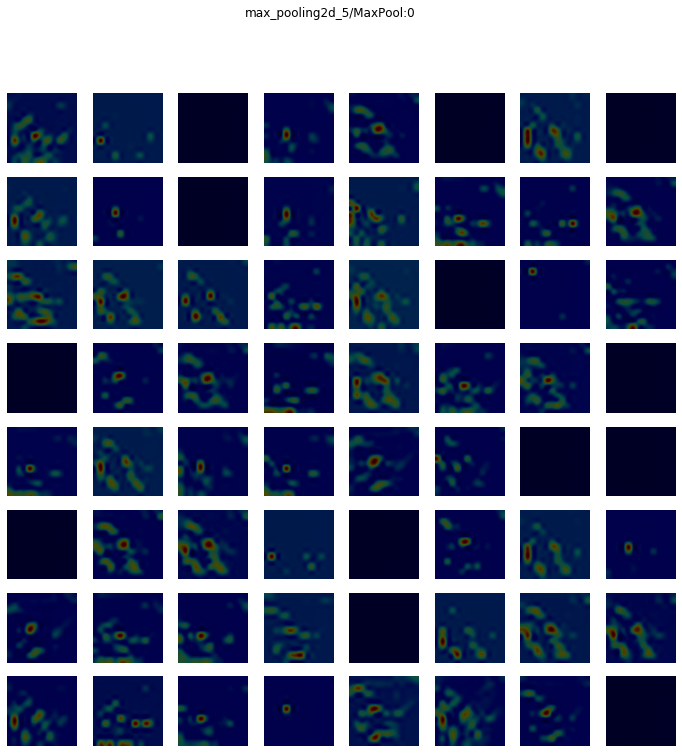

flatten_1/Reshape:0 (1, 12544) -> Skipped. 2D Activations.
dense_1/Relu:0 (1, 512) -> Skipped. 2D Activations.
dense_2/Softmax:0 (1, 5) -> Skipped. 2D Activations.


In [0]:
from keract import display_heatmaps
display_heatmaps(activations, x, save=False)